In [2]:
# import pydeconv
import pydeconv.point_spread_function as psf
from skimage import data,color
import matplotlib.pyplot as plt
import numpy as np

from skimage.transform import rescale, resize, downscale_local_mean


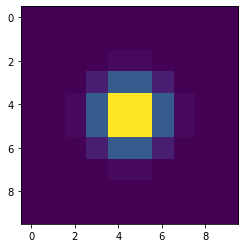

In [3]:
image = color.rgb2gray(data.astronaut())
image = rescale(image, 0.25, anti_aliasing=False)
psf_dims,psf_mu,psf_sigma = [10,10],[0,0],[0.2,0.2]
psf_image = psf.gaussian(dims=psf_dims, mu=psf_mu, sigma=psf_sigma)

plt.imshow(image)
plt.imshow(psf_image)

In [4]:
r_dist = psf.radial_map(image)
sigma_map = psf.map_of_fun(r_dist, lambda r : [r + 0.01, r + 0.01])
mu_map = psf.map_of_fun(r_dist, lambda r : [0, 0])

# sigma_map = psf.map_of_fun(r_dist, lambda r : [0.2,0.2])
# mu_map = psf.map_of_fun(r_dist, lambda r : [0, 0])

variable_psf_image = psf.variable_gaussian_psf(image, psf_dims, mu_map, sigma_map)

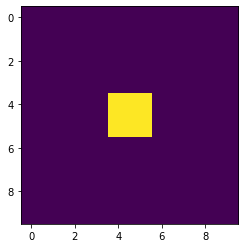

In [5]:
plt.imshow(variable_psf_image[64,64])

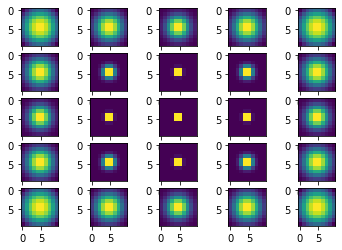

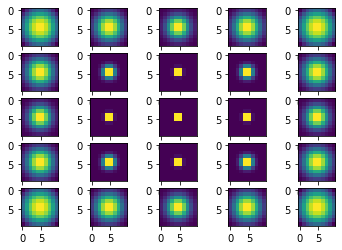

In [6]:
psf.show_psf_grid(variable_psf_image)
# plt.show()

In [7]:
# fig, axs = plt.subplots(5,5)
# grid_shape = variable_psf_image[:,:,0,0].shape
# segments = np.divide(grid_shape,[5+1,5+1])
# for i,ax in enumerate(axs):
#     for i, row in enumerate(axs):
#         for j, ax in enumerate(row):
#             axs[i,j].imshow(variable_psf_image[
#                         int(segments[0]*(i+1)),
#                         int(segments[1]*(j+1)),:,:])
# return fig
# plt.show()
#     # print(i)

In [8]:
# axs

100%|██████████| 16384/16384 [00:04<00:00, 3845.07it/s]


[########################################] | 100% Completed | 10.2s


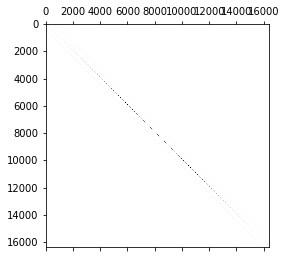

In [9]:
# Build H from PSF
H = psf.psf_to_H(variable_psf_image)
plt.matshow(H.todense(),cmap="binary")
# psf_array = variable_psf_image